## <b>01 : Frame the Problem</b>

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

In [ ]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 11945106216465475018
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 14328594432
locality {
  bus_id: 1
  links {
  }
}
incarnation: 5742555735815888812
physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"
xla_global_id: 416903419
]


## <b>02 : Obtaining the Data</b>

In [ ]:
ls -l

total 4
drwxr-xr-x 1 root root 4096 Aug 14 13:34 sample_data/


In [ ]:
!wget https://www.dropbox.com/s/avul1qk8eeaqebo/dataset.zip

--2023-08-16 00:41:45--  https://www.dropbox.com/s/avul1qk8eeaqebo/dataset.zip
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.18, 2620:100:6016:18::a27d:112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/avul1qk8eeaqebo/dataset.zip [following]
--2023-08-16 00:41:46--  https://www.dropbox.com/s/raw/avul1qk8eeaqebo/dataset.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucfc578de19787faa9a2f0f96c6b.dl.dropboxusercontent.com/cd/0/inline/CB3NSIfZun29RXGRYFARxxkYacrFt3eoX5PtaVaT-8QLjt0KpzkEVojbjy5eWkhGSr9RTbWvwcF0jJ9mxYjjtnU_Pkt6xDoZ6Fj2cCDAc9jGtkEnUJwJoXsMH2-4v3648fw/file# [following]
--2023-08-16 00:41:46--  https://ucfc578de19787faa9a2f0f96c6b.dl.dropboxusercontent.com/cd/0/inline/CB3NSIfZun29RXGRYFARxxkYacrFt3eoX5PtaVaT-8QLjt0KpzkEVojbjy5eWkhGSr9RTbWvwcF0jJ9mxYjjtnU_Pkt6xDoZ6Fj2cCDAc9jGtkEnUJwJoXsMH2-4v3

In [ ]:
ls -l

total 222036
-rw-r--r-- 1 root root 227353580 Aug 16 00:41 dataset.zip
drwxr-xr-x 1 root root      4096 Aug 14 13:34 sample_data/


In [ ]:
!unzip dataset.zip >> 0

In [ ]:
!ls -l

total 222556
-rw-r--r-- 1 root root    522131 Aug 16 00:41 0
drwxr-xr-x 5 root root      4096 Jun  6  2018 dataset
-rw-r--r-- 1 root root 227353580 Aug 16 00:41 dataset.zip
drwxrwxr-x 3 root root      4096 Aug  9  2018 __MACOSX
drwxr-xr-x 1 root root      4096 Aug 14 13:34 sample_data


In [ ]:
!ls -alh dataset

total 20K
drwxr-xr-x 5 root root 4.0K Jun  6  2018 .
drwxr-xr-x 1 root root 4.0K Aug 16 00:41 ..
-rw-r--r-- 1 root root    0 Jun  6  2018 Icon
drwxr-xr-x 2 root root 4.0K Jun  7  2018 single_prediction
drwxr-xr-x 4 root root 4.0K Jun  6  2018 test_set
drwxr-xr-x 4 root root 4.0K Jun  6  2018 training_set


In [ ]:
!ls -alh dataset/training_set/

total 264K
drwxr-xr-x 4 root root 4.0K Jun  6  2018 .
drwxr-xr-x 5 root root 4.0K Jun  6  2018 ..
drwxr-xr-x 2 root root 128K Aug  9  2018 cats
drwxr-xr-x 2 root root 128K Aug  9  2018 dogs
-rw-r--r-- 1 root root    0 Jun  6  2018 Icon


In [ ]:
!ls -alh dataset/test_set/

total 76K
drwxr-xr-x 4 root root 4.0K Jun  6  2018 .
drwxr-xr-x 5 root root 4.0K Jun  6  2018 ..
drwxr-xr-x 2 root root  32K Aug  9  2018 cats
drwxr-xr-x 2 root root  36K Aug  9  2018 dogs
-rw-r--r-- 1 root root    0 Jun  6  2018 Icon


## <b>03 : Feature Engineering</b>

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

In [ ]:
test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
ls -l

total 222556
-rw-r--r-- 1 root root    522131 Aug 16 00:41 0
drwxr-xr-x 5 root root      4096 Jun  6  2018 dataset/
-rw-r--r-- 1 root root 227353580 Aug 16 00:41 dataset.zip
drwxrwxr-x 3 root root      4096 Aug  9  2018 __MACOSX/
drwxr-xr-x 1 root root      4096 Aug 14 13:34 sample_data/


In [ ]:
cd dataset/


/content/dataset


In [ ]:
ls -l

total 12
-rw-r--r-- 1 root root    0 Jun  6  2018 Icon
drwxr-xr-x 2 root root 4096 Jun  7  2018 single_prediction/
drwxr-xr-x 4 root root 4096 Jun  6  2018 test_set/
drwxr-xr-x 4 root root 4096 Jun  6  2018 training_set/


In [ ]:
cd training_set

/content/dataset/training_set


In [ ]:
ls -l

total 256
drwxr-xr-x 2 root root 131072 Aug  9  2018 cats/
drwxr-xr-x 2 root root 131072 Aug  9  2018 dogs/
-rw-r--r-- 1 root root      0 Jun  6  2018 Icon


In [ ]:
cd cats/

/content/dataset/training_set/cats


In [ ]:
ls

cat.1000.jpg  cat.171.jpg   cat.2447.jpg  cat.3170.jpg  cat.3888.jpg
cat.1001.jpg  cat.1720.jpg  cat.2448.jpg  cat.3171.jpg  cat.3889.jpg
cat.1002.jpg  cat.1722.jpg  cat.2449.jpg  cat.3172.jpg  cat.388.jpg
cat.1003.jpg  cat.1723.jpg  cat.244.jpg   cat.3173.jpg  cat.3890.jpg
cat.1004.jpg  cat.1724.jpg  cat.2450.jpg  cat.3174.jpg  cat.3891.jpg
cat.1005.jpg  cat.1725.jpg  cat.2451.jpg  cat.3175.jpg  cat.3892.jpg
cat.1006.jpg  cat.1726.jpg  cat.2452.jpg  cat.3176.jpg  cat.3893.jpg
cat.1007.jpg  cat.1727.jpg  cat.2453.jpg  cat.3177.jpg  cat.3894.jpg
cat.1008.jpg  cat.1728.jpg  cat.2454.jpg  cat.3178.jpg  cat.3895.jpg
cat.1009.jpg  cat.1729.jpg  cat.2455.jpg  cat.3179.jpg  cat.3896.jpg
cat.100.jpg   cat.172.jpg   cat.2456.jpg  cat.317.jpg   cat.3897.jpg
cat.1010.jpg  cat.1730.jpg  cat.2457.jpg  cat.3180.jpg  cat.3898.jpg
cat.1011.jpg  cat.1731.jpg  cat.2458.jpg  cat.3181.jpg  cat.3899.jpg
cat.1012.jpg  cat.1732.jpg  cat.2459.jpg  cat.3182.jpg  cat.389.jpg
cat.1013.jpg  cat.1733.jpg  cat.245.

In [ ]:
cd /content

/content


In [ ]:
ls

0  dataset/  dataset.zip  __MACOSX/  sample_data/


In [ ]:
training_set = train_datagen.flow_from_directory('dataset/training_set',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 7863 images belonging to 2 classes.


In [ ]:
test_set = test_datagen.flow_from_directory('dataset/test_set',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 1955 images belonging to 2 classes.


## <b>04 : Model Selection</b>

In [ ]:
classifier = Sequential()

In [ ]:
classifier.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))

In [ ]:
classifier.add(MaxPooling2D(pool_size = (2, 2)))

In [ ]:
classifier.add(Conv2D(64, (3, 3),  activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

In [ ]:
classifier.add(Flatten())

In [ ]:
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(units = 1, activation = 'sigmoid'))

In [ ]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 12544)             0         
                                                                 
 dense (Dense)               (None, 128)               1

In [ ]:
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

## <b>05: Fitting and Prediction</b>

In [ ]:
classifier.fit_generator(training_set,
                         steps_per_epoch = 100,
                         epochs = 50,
                         validation_data = test_set,
                         validation_steps = 10)

Epoch 1/150


<ipython-input-33-c90fb9dfb777>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  classifier.fit_generator(training_set,


100/100 [==============================] - 19s 82ms/step - loss: 0.6881 - accuracy: 0.5456 - val_loss: 0.6520 - val_accuracy: 0.6344
Epoch 2/150
100/100 [==============================] - 8s 79ms/step - loss: 0.6429 - accuracy: 0.6371 - val_loss: 0.6400 - val_accuracy: 0.6094
Epoch 3/150
100/100 [==============================] - 8s 78ms/step - loss: 0.6283 - accuracy: 0.6581 - val_loss: 0.6469 - val_accuracy: 0.6313
Epoch 4/150
100/100 [==============================] - 9s 94ms/step - loss: 0.6071 - accuracy: 0.6856 - val_loss: 0.5688 - val_accuracy: 0.6906
Epoch 5/150
100/100 [==============================] - 9s 89ms/step - loss: 0.5814 - accuracy: 0.6948 - val_loss: 0.5303 - val_accuracy: 0.7312
Epoch 6/150
100/100 [==============================] - 9s 86ms/step - loss: 0.5607 - accuracy: 0.7081 - val_loss: 0.5851 - val_accuracy: 0.6844
Epoch 7/150
100/100 [==============================] - 8s 78ms/step - loss: 0.5412 - accuracy: 0.7233 - val_loss: 0.4838 - val_accuracy: 0.7719
Epo

In [ ]:
classifier.get_weights()

[array([[[[-0.08023769,  0.05446704,  0.12622593,  0.11128315,
           -0.23007661, -0.12846035, -0.24235599, -0.17582147,
           -0.18486774, -0.21605514, -0.14869973,  0.17283793,
           -0.09227959,  0.26343265, -0.15642814, -0.03565626,
            0.14127868,  0.15746589,  0.06684465, -0.09541034,
            0.00844188, -0.22667003, -0.10171208, -0.23090857,
           -0.01935218, -0.2592222 , -0.25036368, -0.20315985,
            0.14357902, -0.23744157,  0.21690041,  0.00555435],
          [-0.2557505 , -0.055417  ,  0.30715767,  0.25510347,
           -0.29585433,  0.06423315, -0.10139374, -0.00933578,
           -0.36399174, -0.06112319, -0.09748793,  0.0585148 ,
           -0.07667062, -0.17597443, -0.12156321, -0.01347203,
           -0.05562737,  0.12517017,  0.13720827, -0.14016552,
            0.00503145,  0.02579279,  0.05579943,  0.1390899 ,
            0.18228425, -0.03760979,  0.05272873, -0.00254271,
            0.2210655 , -0.11545432, -0.18667772, -0.2

In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving cat.jpg to cat.jpg
User uploaded file "cat.jpg" with length 9549 bytes


## 06: Prediction on new class

In [ ]:
from keras.preprocessing import image
import numpy as np

In [ ]:
!wget https://www.dropbox.com/s/qr2girs8xh6ay8f/test_image.jpeg

--2023-08-16 01:21:32--  https://www.dropbox.com/s/qr2girs8xh6ay8f/test_image.jpeg
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.18, 2620:100:6016:18::a27d:112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/qr2girs8xh6ay8f/test_image.jpeg [following]
--2023-08-16 01:21:32--  https://www.dropbox.com/s/raw/qr2girs8xh6ay8f/test_image.jpeg
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc05d1beedbc74d69c12519b1887.dl.dropboxusercontent.com/cd/0/inline/CB7ZF-Hm3T-MM7vYyL-K6h-G-nFc1ry7uYp3MbWeW99dPeAOORTzCHXGNBHl_B4o7_WpG1YTZaltGBVz1PNejBJFDwgwnCTSAu4FIn_AeeRE_PMX4fpbXY8g5zpi5oHk9Vc/file# [following]
--2023-08-16 01:21:33--  https://uc05d1beedbc74d69c12519b1887.dl.dropboxusercontent.com/cd/0/inline/CB7ZF-Hm3T-MM7vYyL-K6h-G-nFc1ry7uYp3MbWeW99dPeAOORTzCHXGNBHl_B4o7_WpG1YTZaltGBVz1PNejBJFDwgwnCTSAu4FIn_AeeRE_PMX4f

<h4> Test Image </h4>
<center><img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRJTD5vZOC6UiCvEwqHgpnRrdPpd-nbB185-3vD-NlZmA&s" ></img></center>



In [ ]:
from keras.utils import load_img

test_image = load_img('cat.jpg', target_size=(64,64))

In [ ]:
import keras.utils as image
test_image = image.img_to_array(test_image)

In [ ]:
test_image = np.expand_dims(test_image, axis=0)

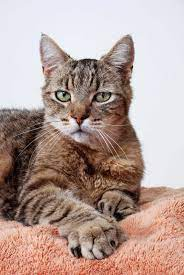

In [ ]:
from IPython.display import Image
Image(filename="cat.jpg")

In [ ]:
result = classifier.predict(test_image)

1/1 [==============================] - 0s 163ms/step


In [ ]:
training_set.class_indices

{'cats': 0, 'dogs': 1}

In [ ]:
 result

array([[0.]], dtype=float32)

In [ ]:
if result[0][0] == 0:
  print("Cat")
else:
  print("Dog")

Cat


In [ ]:
type(result)

numpy.ndarray

In [ ]:
result

array([[0.]], dtype=float32)